<a href="https://colab.research.google.com/github/KutapiAise/MMML/blob/master/ai_FraudDetection_liveSession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import random


**Fraud Detection**

Our tasks

*   Explore the dataset/visualize
*   Decide which features are important
*   Perform Machine learning
*   Test the model on the testing set







In [0]:
df = pd.read_csv('creditcard.csv',low_memory=False)
df = df.sample(frac=1).reset_index(drop=False)
df.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,235030,148212.0,1.893193,-0.356911,-0.284687,0.482749,-0.640921,-0.631686,-0.335358,-0.136799,1.111946,-0.222126,-0.577131,1.117826,1.162727,-0.232646,0.586840,0.088636,-0.545089,-0.406828,-0.168637,-0.078774,-0.136022,-0.275964,0.328971,-0.026586,-0.423279,-0.627261,0.037245,-0.021455,49.99,0
1,239303,150041.0,2.112900,0.708255,-3.316643,0.659300,1.190690,-2.214111,1.184025,-0.671180,0.152928,-0.989553,-0.080917,-0.310265,-0.749395,-1.372961,0.275524,-0.446114,1.813585,0.548995,-0.280904,-0.254579,0.176506,0.773730,-0.263414,-0.158425,0.879745,-0.189920,-0.021938,-0.031027,1.00,0
2,120468,75839.0,-0.635995,0.937224,0.894019,-0.282678,0.870458,0.258952,0.523983,0.183416,-0.652047,-0.292577,1.094039,0.878936,1.058824,-0.472220,0.431214,0.492852,-0.341012,0.080424,0.179970,0.133684,-0.227255,-0.533720,0.054649,-0.877740,-0.088387,0.129143,0.151645,0.056006,2.58,0
3,239372,150075.0,0.067551,0.601325,1.317464,4.529598,0.301858,1.041750,-0.277797,0.373576,-1.386291,1.750149,-0.141688,-0.483083,-0.583645,0.234295,-0.124890,0.357175,-0.307992,1.277513,1.301217,0.241543,0.465484,1.338635,0.196847,-0.344737,-1.589232,0.312962,0.334584,0.302698,45.06,0
4,239333,150051.0,1.898510,-0.922520,-0.649560,-0.798661,-0.721101,-0.064760,-0.787303,0.146956,1.522735,-0.289679,0.783782,0.959655,-0.339569,0.051669,0.063864,0.174936,-0.521479,0.500715,0.439921,-0.058134,0.266459,0.836335,0.114063,0.736882,-0.290676,0.729831,-0.051259,-0.050294,59.50,0


In [0]:
frauds = df.loc[df['Class']==1]
non_frauds=df.loc[df['Class']==0]
print(len(frauds))
print(len(non_frauds))

492
284315


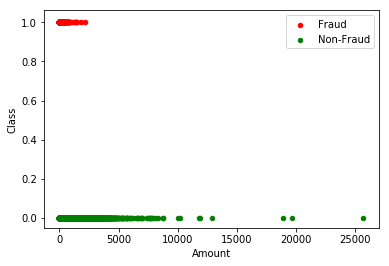

In [0]:
ax=frauds.plot.scatter(x='Amount', y='Class',color ='red',label='Fraud')
non_frauds.plot.scatter(x="Amount", y="Class",color="green",label ="Non-Fraud",ax=ax)
plt.show()

#note that this plot gives us the intution of the amount vs fraud relation. 
#Inference:
#
# Most of the cases are classified fraudulent when the amount is small
#this can be visualizedin the scatter plot
# 

#for the assignment you should make different graphs using barplot, saeaborn or pyplot or etc

- how to handle clear case of class imbalance?

Sirajs go to methodology is adopting "Clustering". but surely there are other methods that one can adopt

- How to decide whether to perform logistic regression next?

Go to google and search for  images find the one that differentiates linear and logistic regression.

With scikit learn we could bild 7 models in  7 lines of code and have them all trained in parallel.And look at all different accuracy scores and see which one is better at predictions. Unfortunately we dont have any sure shot way as to why some models work better than the others. That is where the math knowledge comes in to play.

Since the data is imbalances , we believe that logistic regression is better than linear regression for the fraud detection problem.if the classes were pretty evenly split, liner would be better.

 - Get used to AutoML , later in the course











In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x=df.iloc[:, :-1]
y= df["Class"]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.35)

In [0]:
logistic= linear_model.LogisticRegression(C=1e5)  #100,000
#c is the penalty statistical term ofr over fitting
# read more about it 

logistic.fit(X_train,y_train)
print("score:", logistic.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score: 0.9987861521021638


In [0]:
y_predicted=np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


 * to check if its overitting , plot the graph and just check if the line is ltrying to fit across all or most of sample points, if not then it's probably not overfitting. 

        You could check different models and check which one gives you the most optimal results. Try it on the real world data.


* How to get the correct value for hyperparameter "c" in logistic regression? Ths can be done throughr regularization- it attempts to engineer the model paramters such that it prevents overfitting for all the ML problems.


      There is actually a lot of theory on  it. (quora)

Q. What is the stripe alternative for countries that don't have stripe. ?
- rasorpay - India
- braintree
- paypay


Q. How to learn things?
  * 4-5 hours a day. Get to the point that you could probably learn anything in just 2 days or a day.

  * Turn off social media, just be alone. Immerse yourself in the world of topic that you are trying to laern- Focus- you will larn that fast


* For those who graduate the course thay will be referred.

How to you beat create datasets/
Pandas- yiu will want it to clearly label all the columns,remove all the empty values from the dataset.

Think about about the mid-term project. You will be paired to create a startup